In [195]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [244]:
df = pd.read_csv("Uber Request Data.csv")

In [197]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [245]:
print(df.shape)

(6745, 6)


## Cleaning the Data

-  ### Inspecting Null values

Finding the percentage of Null values in each column.

In [199]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [202]:
# Formatting columns
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],dayfirst=True)
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [203]:
df['Weekday'] = df['Request timestamp'].dt.day_name()
df['Rq_hour'] = df['Request timestamp'].dt.hour

## Visualization Plots

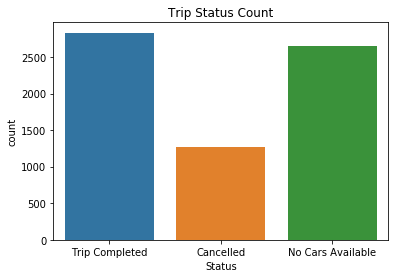

In [205]:
# plotting graph for trip status
plt.title('Trip Status Count')
sns.countplot(x=df['Status'])

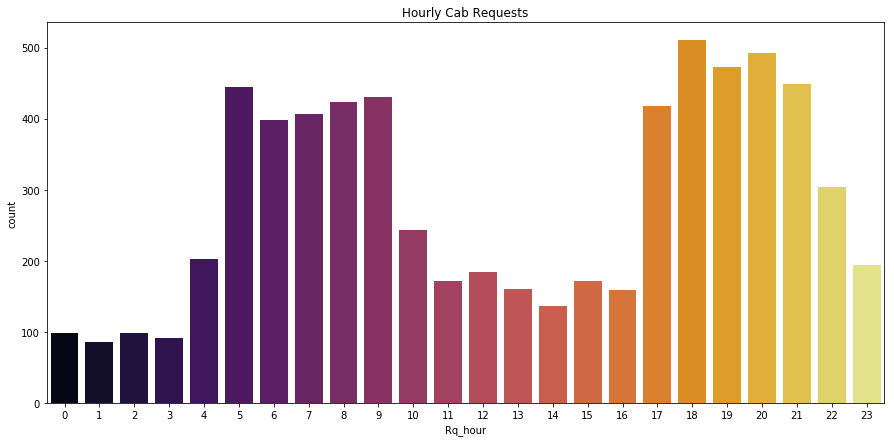

In [206]:
# plot data to show status count for each hour
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Hourly Cab Requests")
#ax = sns.countplot(x='Rq_hour',hue='Status',palette="inferno",data=df)
ax = sns.countplot(x='Rq_hour',palette="inferno",data=df)
#plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

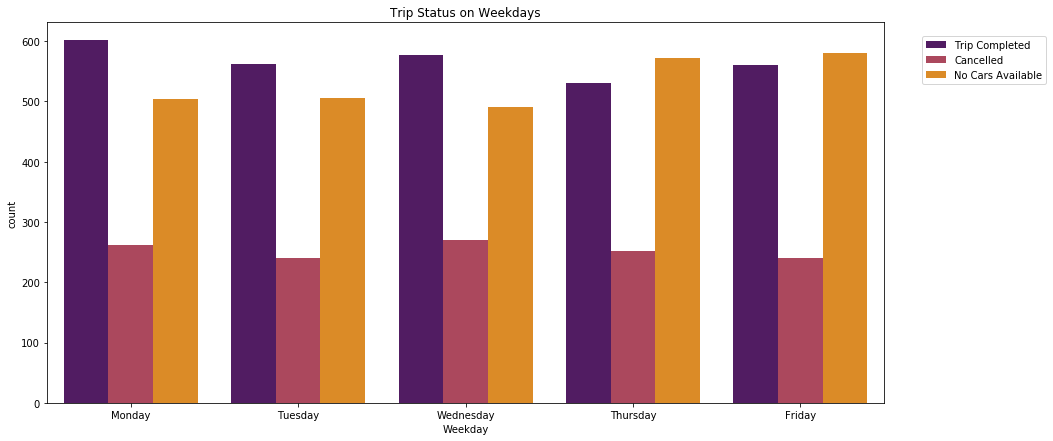

In [208]:
#Trip status count for each day of the week
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Trip Status on Weekdays")
ax = sns.countplot(x='Weekday',hue='Status',palette="inferno",data=df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

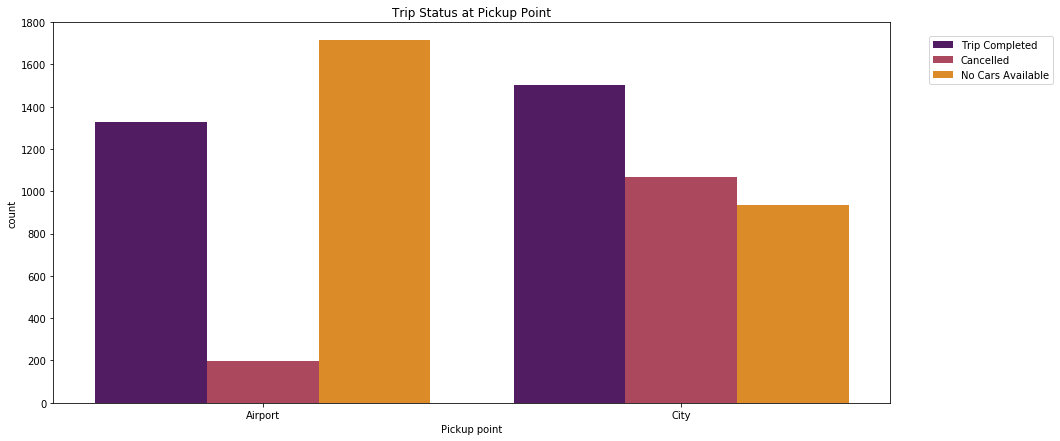

In [209]:
# Trip status count for pickup point
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Trip Status at Pickup Point")
ax = sns.countplot(x='Pickup point',hue='Status',palette="inferno",data=df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

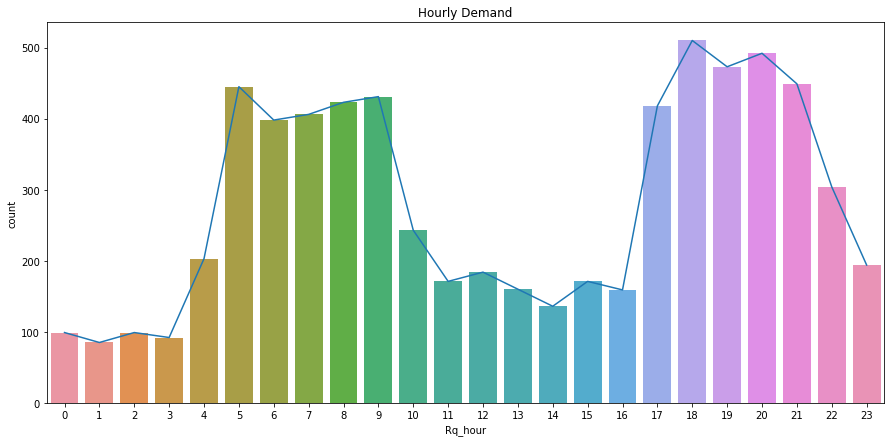

In [213]:
# plot data to show hourly distribution of request/demand
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Hourly Demand')
a=df.groupby(df['Rq_hour']).count()['Request id'].plot(ax=ax)
#df.groupby(df['Rq_hour']).count()['Request id'].plot(ax=ax)
ax=sns.countplot(x=df['Rq_hour'])

### Peak hours for cab requests lie between 5AM to 9AM and between 5PM to 9PM. 

## Both of these Heatmaps tell the same story. Uber cannot keep up with the demand at the peak request hours. It will be a good idea now to see the location of the demand vs supply gap i.e. Airport or the City.

## Time Slots

In [217]:
# dividing request hours into time slots
def per(x):
    if x<5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Night"
    
df["time_slot"] = df.Rq_hour.apply(lambda x:per(x))

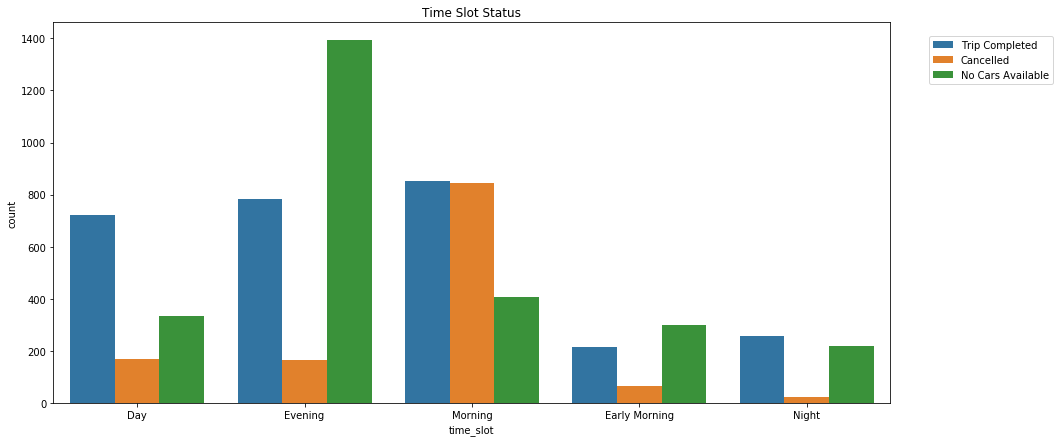

In [218]:
# time slot and trip status comparison
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Time Slot Status")
ax = sns.countplot(x = "time_slot", hue = "Status", data = df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

In [219]:
morning= df[df.time_slot == "Morning"]

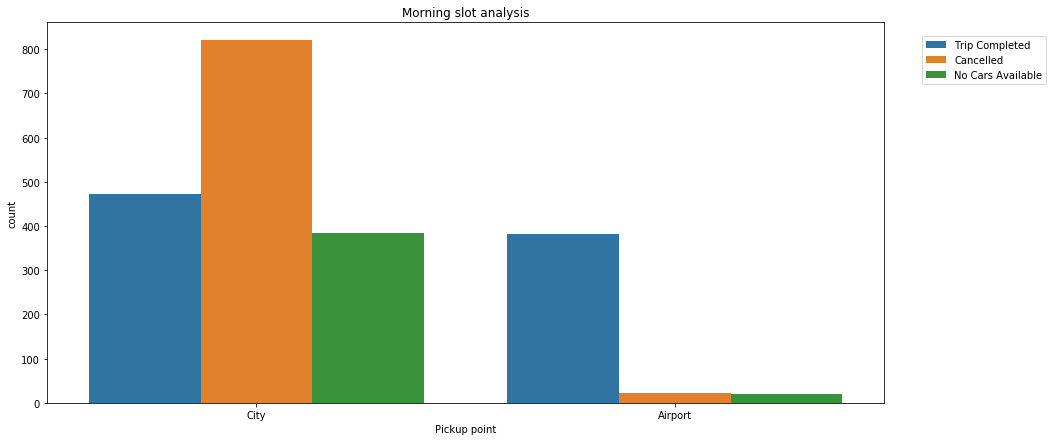

In [220]:
# Analysing trip status in morning slot
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Morning slot analysis")
sns.countplot(x="Pickup point", hue="Status", data =morning)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

In [221]:
evening= df[df.time_slot == "Evening"]

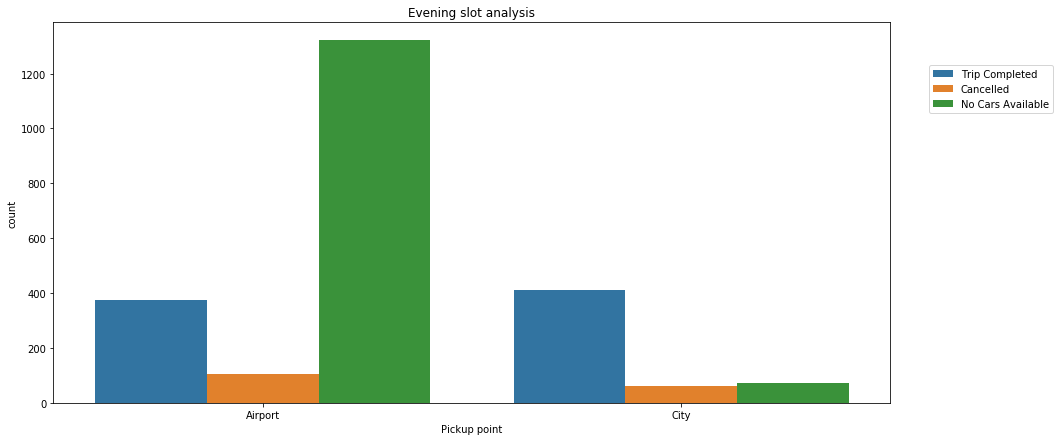

In [222]:
# Analysing trip status in evening slot
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Evening slot analysis")
sns.countplot(x="Pickup point", hue="Status", data =evening)
plt.legend( loc='best',bbox_to_anchor=(1.2, 0.9))

# Demand-Supply

-  ### Demand supply at city

##### evening data

In [225]:
#trips completed
evening.loc[(evening["Pickup point"]=="City") & (evening["Status"].isin(["Trip Completed"]))].shape[0]

411

In [226]:
# trips cancelled
evening.loc[(evening["Pickup point"]=="City") & (evening["Status"].isin(["Cancelled"]))].shape[0]

60

In [227]:
# trips when cab unavailable
evening.loc[(evening["Pickup point"]=="City") & (evening["Status"].isin(["No Cars Available"]))].shape[0]

71

In [228]:
# Total requests
evening.loc[(evening["Pickup point"]=="City")].shape[0]

542

#### morning data

In [229]:
morning.loc[(morning["Pickup point"]=="City") & (morning["Status"].isin(["Trip Completed"]))].shape[0]

472

In [230]:
morning.loc[(morning["Pickup point"]=="City") & (morning["Status"].isin(["Cancelled"]))].shape[0]

820

In [231]:
morning.loc[(morning["Pickup point"]=="City") & (morning["Status"].isin(["No Cars Available"]))].shape[0]

385

In [232]:
# Total requests
morning.loc[(morning["Pickup point"]=="City")].shape[0]

1677

- ### Demand- Supply at Airport

##### evening data

In [234]:
#trips completed
evening.loc[(evening["Pickup point"]=="Airport") & (evening["Status"].isin(["Trip Completed"]))].shape[0]

373

In [235]:
# trips cancelled
evening.loc[(evening["Pickup point"]=="Airport") & (evening["Status"].isin(["Cancelled"]))].shape[0]

106

##### morning data

In [238]:
morning.loc[(morning["Pickup point"]=="Airport") & (morning["Status"].isin(["Trip Completed"]))].shape[0]

382

In [239]:
morning.loc[(morning["Pickup point"]=="Airport") & (morning["Status"].isin(["Cancelled"]))].shape[0]

23